### Lab Assignment 1: Python ML Environment Setup

#### Aim: To set up the Python environment for Machine Learning and perform basic data manipulation and visualization using the Iris dataset.

### Task 1: Environment Setup

#### 1. Installing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2. Verifing Installation 

In [2]:
print(pd.__version__)

2.2.2


In [3]:
print(np.__version__)

1.26.4


In [4]:
print(sns.__version__)

0.13.2


### Task 2: Load and Explore the Dataset

### 1. Load the iris dataset

In [5]:
 df = sns.load_dataset('iris')

In [6]:
#from sklearn.datasets import load_iris
#iris = load_iris()
#df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#df['species'] = iris.target
#df.head()

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Display basic dataset information

Numbers of rows and columns

In [8]:
df.shape

(150, 5)

Data Types of Features

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Summary statistics

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['sepal_length'].mean()

5.843333333333334

In [13]:
df['sepal_width'].mean()

3.0573333333333337

In [14]:
corr = df.corr(numeric_only = True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Task 3: Data Visualization

### 1. Generate baisc Visualizations:

Histogram for Feature distributions

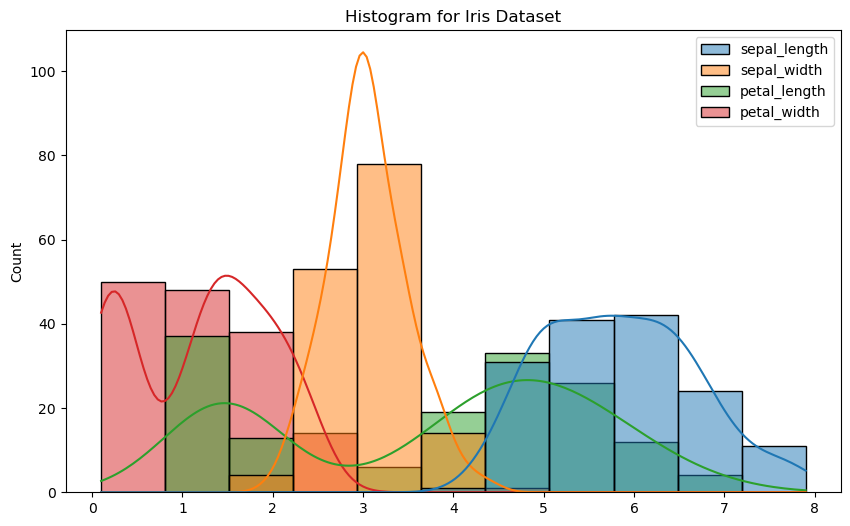

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df,kde = True)
plt.title('Histogram for Iris Dataset')
plt.show()

<Figure size 1000x600 with 0 Axes>

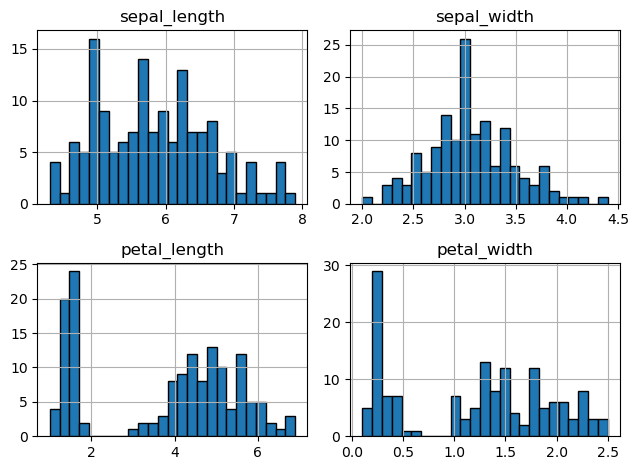

In [28]:
plt.figure(figsize = (10,6))
df.hist(bins = 25,edgecolor = 'black')
plt.tight_layout()
plt.show()

Box Plots to detect outliers

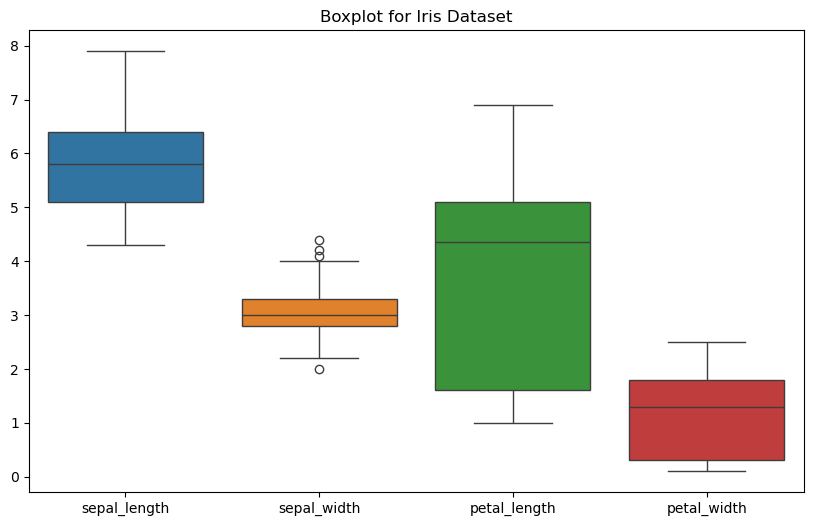

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df)
plt.title('Boxplot for Iris Dataset')
plt.show()

Pair plots using seaborn to explore feature relationships

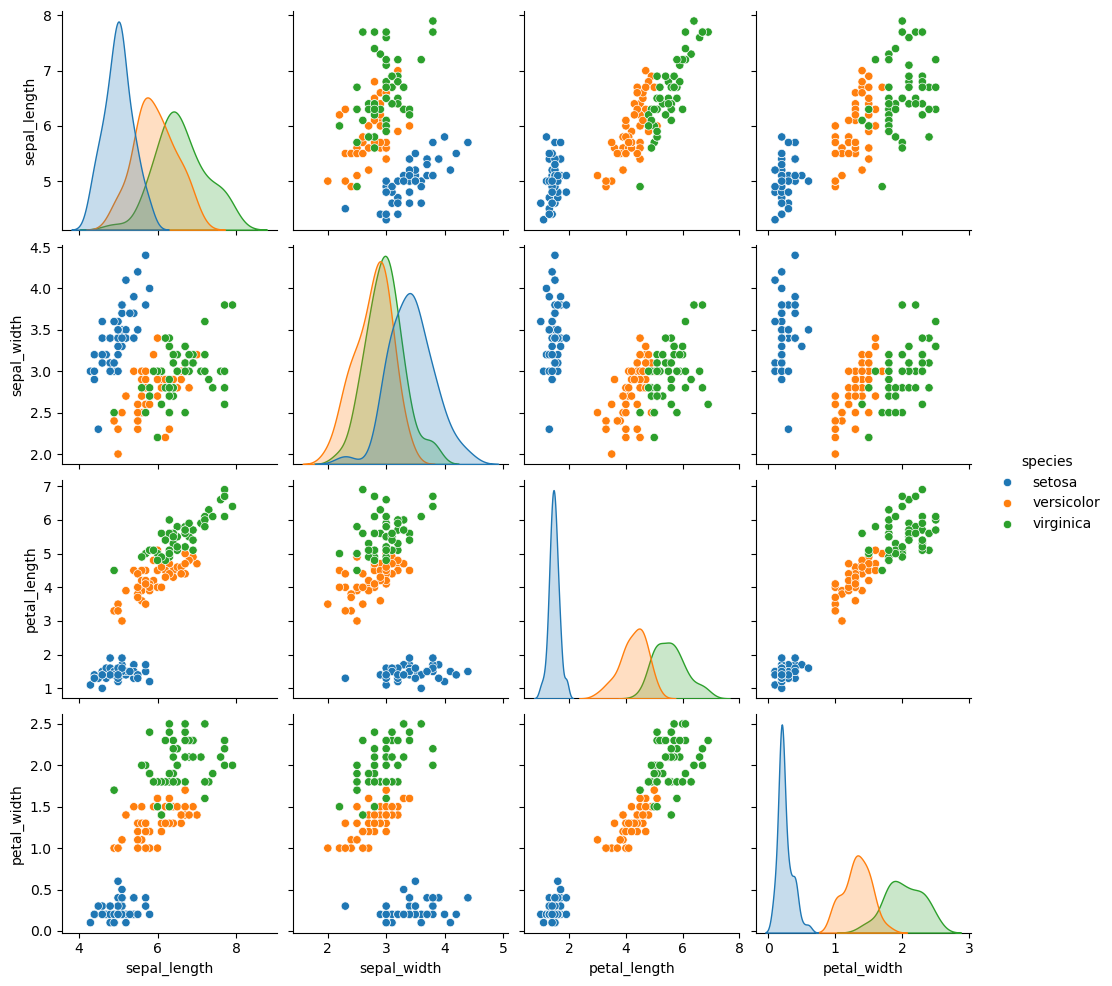

In [18]:
sns.pairplot(df,hue = 'species')
plt.show()

Correlation heatmap to study relationship between variables

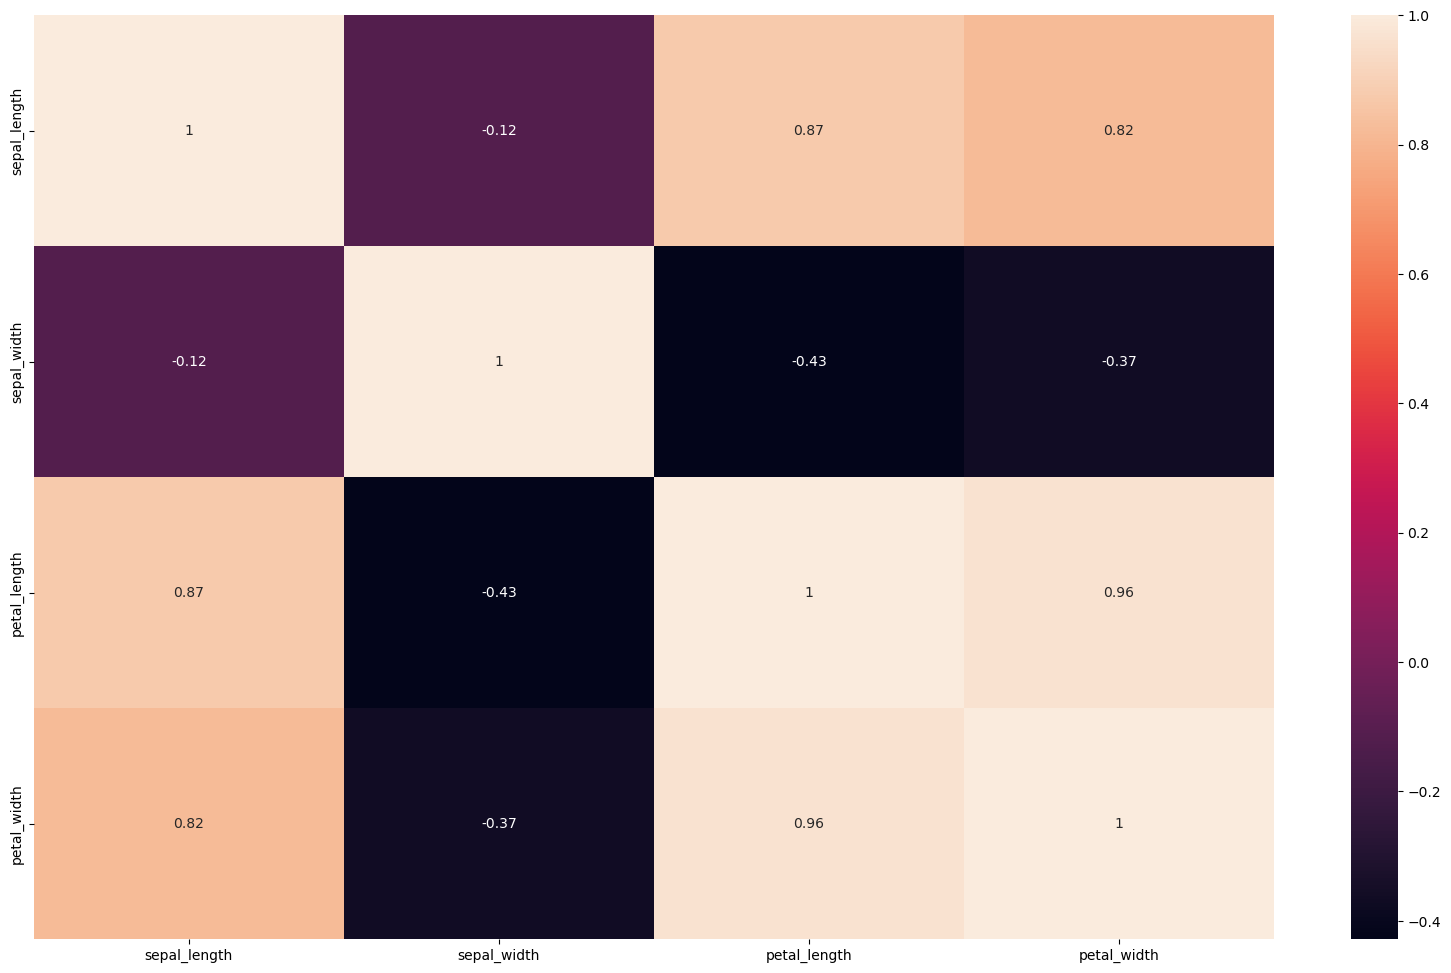

In [19]:
plt.figure(figsize = (20,12))
sns.heatmap(corr,annot = True)
plt.show()

### Task 4: Basic Data Preprocessing

### 1. Handing missing values

In [20]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 2. Normalize feature values

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

### 3. Split the dataset into training and test sets(80-20)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)